In [12]:
import numpy as np
import matplotlib.pylab as plt
import scipy as sp
from scipy import special
import matplotlib.pylab as mpl
import seaborn as sns
import statsmodels.api as sm

In [2]:
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False )

In [8]:
import warnings
warnings.filterwarnings('ignore')

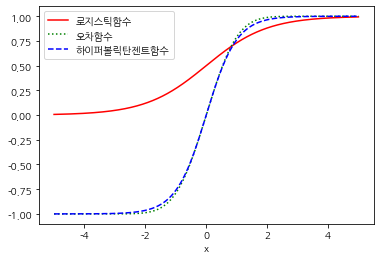

In [3]:
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label='로지스틱함수')
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="오차함수")
plt.plot(xx, np.tanh(xx), 'b--', label="하이퍼볼릭탄젠트함수")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.show()

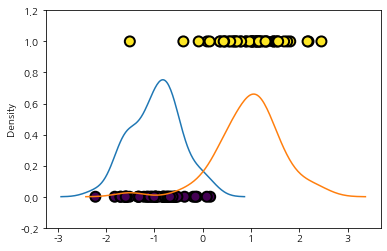

In [9]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.distplot(X0[y == 0, :], label="y = 0", hist=False)
sns.distplot(X0[y == 1, :], label="y = 1", hist=False)
plt.ylim(-0.2, 1.2)
plt.show()


In [17]:
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 01 Mar 2022   Pseudo R-squ.:                  0.7679
Time:                        19:00:47   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


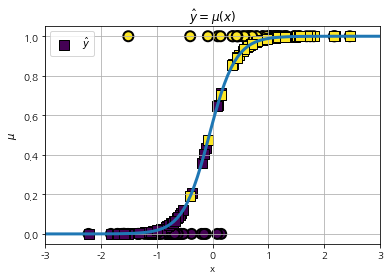

In [21]:
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx))

plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor='k', lw=2)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1)
plt.xlim(-3, 3)
plt.xlabel('x')
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y} = \mu(x)$")
plt.grid(True)
plt.legend()
plt.show()

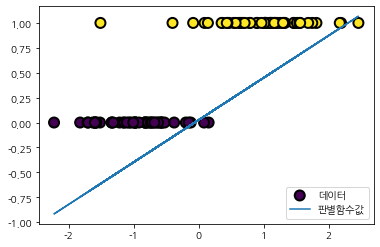

In [22]:
plt.scatter(X0, y, c=y, s=100, edgecolor='k', lw=2, label='데이터')
plt.plot(X0, logit_res.fittedvalues*0.1, label='판별함수값')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)
log_loss(y, y_hat, normalize=False)

16.084355200413036

In [24]:
mu_null = np.sum(y)/len(y)
mu_null

0.51

In [25]:
y_null = np.ones_like(y) * mu_null
log_loss(y, y_null, normalize=False)

69.29471672244784

In [26]:
1 - (log_loss(y, y_hat) / log_loss(y, y_null))

0.7678848264170398

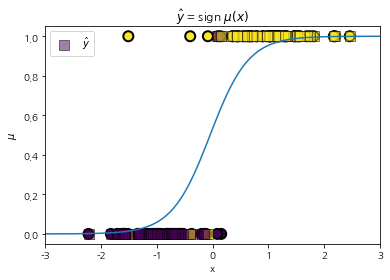

In [29]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
mu = 1.0/(1 + np.exp(-model_sk.coef_[0][0]*xx - model_sk.intercept_[0]))

plt.plot(xx, mu)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, model_sk.predict(X0), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1, alpha=0.5)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y}$ = sign $\mu(x)$")
plt.legend()
plt.show()